In [90]:
import pandas as pd
import numpy as np

df_origin = pd.read_csv("..\kaggle_dataset\marketing_campaign\marketing_campaign.csv", sep=";")
df = df_origin.copy()

df.head()

<>:4: SyntaxWarning: invalid escape sequence '\k'
<>:4: SyntaxWarning: invalid escape sequence '\k'
C:\Users\bhc02\AppData\Local\Temp\ipykernel_16028\2297810201.py:4: SyntaxWarning: invalid escape sequence '\k'
  df_origin = pd.read_csv("..\kaggle_dataset\marketing_campaign\marketing_campaign.csv", sep=";")


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [91]:
#1. 미사용 컬럼 제거
df = df.drop(columns=['Education', 'Marital_Status', 'Dt_Customer', 'Recency', 'Z_CostContact', 'Z_Revenue'])
df.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,58138.0,0,0,635,88,546,172,88,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,46344.0,1,1,11,1,6,2,1,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,71613.0,0,0,426,49,127,111,21,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,26646.0,1,0,11,4,20,10,3,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,58293.0,1,0,173,43,118,46,27,...,3,6,5,0,0,0,0,0,0,0


In [92]:
#2. 결측치 처리
df.isna().sum()
    #Income 결측치가 24개 존재
    #-> 제거로 처리
df = df.dropna()
df.isna().sum()

ID                     0
Year_Birth             0
Income                 0
Kidhome                0
Teenhome               0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

In [93]:
#3. 이상치 처리

# 나이
age_mask = (df['Year_Birth'] > 1930) & (df['Year_Birth'] < 2010)
df = df[age_mask]
# 소득
income_mask = (df['Income'] > 0) & (df['Income'] < 200000)
df = df[income_mask]

In [94]:
#4. 파생변수 생성
    #컬럼으로 추가 : 영구 파생변수 / 변수로만 사용 : 일시 파생변수
    #나이
df['Age'] = 2020 - df['Year_Birth']
    #총 캠페인 반응 횟수
total_cmp = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
df['total_accepted_cmp'] = df[total_cmp].sum(axis=1)

#4.5. (인코딩)
    #문자를 숫자로 바꾸는 작업
    #순서가 있는 데이터 경우 0~n까지 숫자로 매핑 : 라벨인코딩
    #순서가 없는 데이터 경우 더미변수화 : 원핫인코딩
         #ex) single, married, toghether컬럼을 하나씩 만들고 해당되는 칸에 1표시

In [95]:
#5. 정규화
    #수입 정규화_standard
mean_income = df['Income'].mean()
std_income = df['Income'].std()

standard_income = (df['Income'] - mean_income) / std_income
df['Income'] = standard_income

In [96]:
#6. 회귀
import statsmodels.api as sm
    
    #(단순회귀1. 캠페인에 1번 이상 반응한 고객은 온라인 구매를 더 많이 할까?)
#종속변수 Y : NumWebPurchases
#독립변수 X : total_accepted_cmp

    #groupby를 이용한 평균 비교
df['CampaignResponse'] = (df['total_accepted_cmp'] > 0).astype(int)
print(df.groupby('CampaignResponse')['NumWebPurchases'].mean(), end="\n\n")
    #groupby() : 캠페인반응이 같은 사람끼리 group 후 웹구매의 평균을 구한다.

CampaignResponse
0    3.717040
1    5.076159
Name: NumWebPurchases, dtype: float64



groupby _ 캠페인에 한번이라도 반응한 사람은 웹 구매 횟수가 
그렇지 않은 사람보다 평균 약 1.36회 더 많다

In [97]:
    #(단순회귀2. 캠페인에 많이 반응할 수록 온라인 구매가 늘어날까?)
#종속변수 Y : NumWebPurchases
#독립변수 X : total_accepted_cmp

#value_counts() : 각 값이 몇 개 있는지 세기
#sort_index() : 인덱스 순서대로 정렬
df['total_accepted_cmp'].value_counts().sort_index()

    #groupby를 이용한 평균 비교
print(df.groupby('total_accepted_cmp')['NumWebPurchases'].mean())
    #캠페인 반응 횟수별로 group 후 웹구매의 평균을 구한다


    #회귀를 이용한 검증
X1 = df[['total_accepted_cmp']]
X1 = sm.add_constant(X1) 
Y1 = df['NumWebPurchases']

model1 = sm.OLS(Y1, X1).fit()
print(model1.summary())


total_accepted_cmp
0    3.717040
1    4.885870
2    5.151079
3    5.784314
4    5.638889
5    5.400000
Name: NumWebPurchases, dtype: float64
                            OLS Regression Results                            
Dep. Variable:        NumWebPurchases   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     102.0
Date:                Mon, 02 Feb 2026   Prob (F-statistic):           1.74e-23
Time:                        21:52:20   Log-Likelihood:                -5319.6
No. Observations:                2212   AIC:                         1.064e+04
Df Residuals:                    2210   BIC:                         1.065e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [

groupby -> 캠페인 반응횟수가 많을수록 구매금액도 커짐을 알 수 있다

결정계수 R^2 : 0.044 / 캠페인 반응 횟수는 온라인 구매 횟수 변동의 약 4.4%를 설명
  - 관계가 있지만 강력하진 않다

회귀계수 coef : X가 1증가할 때 Y의 변화량

const(β0) 절편 : 3.7986 / 캠페인 반응0회 고객의 평균 온라인 구매 횟수는 3.8회

total_accepted_cmp(β1) 회귀계수 : 0.6451
    / 캠페인 반응횟수 1회 증가 할 때 온라인 구매 평균 0.65회 증가

p-value 통계 신뢰성 : 0.00 (<0.05) / 캠페인 반응횟수와 온라인 구매횟수는 유의미함
    신뢰구간 : 0.520 ~ 0.770 /실제 증가량은 0.52 ~ 0.77회 안에 있을 가능성이 높음

F-statistic p-value : 1.74 

t 개별 회귀계수 검정 : 각 회귀계수를 검정한다
  / t = coef / std err(평균오차) -> 0.645 / 0.064 = 10.1
  / 회귀계수는 표준오차 대비 10배이상 크다 -> 우연일 가능성이 매우 낮다
  / p-value만 봐도 우연성 검증 가능

In [98]:
    #(단순회귀2. 캠페인은 온라인,오프라인,카테고리 중 어디에 더 영향을 미칠까?)
#종속변수 Y : NumWebPurchases | NumCatalogPurchases | NumStorePurchases
#독립변수 X : total_accepted_cmp

X2 = df[['total_accepted_cmp']]
X2 = sm.add_constant(X2)
Y2_web = df['NumWebPurchases']
Y2_catalog = df['NumCatalogPurchases']
Y2_store = df['NumStorePurchases']

model2_web = sm.OLS(Y2_web, X2).fit()
model2_catalog = sm.OLS(Y2_catalog, X2).fit()
model2_store = sm.OLS(Y2_store, X2).fit()
print("웹구매 회귀분석 결과\n", model2_web.summary(), end="\n\n")
print("카탈로그구매 회귀분석 결과\n", model2_catalog.summary(), end="\n\n")
print("매장구매 회귀분석 결과\n", model2_store.summary())

웹구매 회귀분석 결과
                             OLS Regression Results                            
Dep. Variable:        NumWebPurchases   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     102.0
Date:                Mon, 02 Feb 2026   Prob (F-statistic):           1.74e-23
Time:                        21:52:20   Log-Likelihood:                -5319.6
No. Observations:                2212   AIC:                         1.064e+04
Df Residuals:                    2210   BIC:                         1.065e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  

# 회귀결과

#### 웹
- 결정계수 : 0.044
- 절편 : 3.79
- 회귀계수 : 0.6451
- p-value : 0.00

#### 카탈로그
- 결정계수 : 0.123 ★
- 절편 : 2.15
- 회귀계수 : 1.15 ★
- p-value : 0.00

#### 매장
- 결정계수 : 0.028
- 절편 : 5.53
- 회귀계수 : 0.61
- p-value : 0.00

> 캠페인은 카탈로그에 가장 효과를 보임

> 웹, 카탈로그, 매장 모두 캠페인에 유의미한 영향을 받음

In [99]:
    #(다중회귀1. 수입과 연령대를 통제했을 때 캠페인의 효과검증)

#종속변수 Y : NumWebPurchases
#독립변수 X : total_accepted_cmp, Income, Age

X3 = df[['total_accepted_cmp', 'Income', 'Age']]
X3 = sm.add_constant(X3)
Y3_web = df['NumWebPurchases']
model3_web = sm.OLS(Y3_web, X3).fit()
print("웹구매 다중회귀분석 결과\n", model3_web.summary(), end="\n\n")


웹구매 다중회귀분석 결과
                             OLS Regression Results                            
Dep. Variable:        NumWebPurchases   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     207.5
Date:                Mon, 02 Feb 2026   Prob (F-statistic):          1.44e-118
Time:                        21:52:20   Log-Likelihood:                -5094.9
No. Observations:                2212   AIC:                         1.020e+04
Df Residuals:                    2208   BIC:                         1.022e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                

# 다중회귀 분석 결과

#### 결정계수 R^2
- 캠페인 반응만 고려했을 때 : 4.4% 설명
- 캠페인&수입&나이 고려했을 때 : 22% 설명

#### 회귀계수 
- 캠페인 반응만 고려했을 때 : 0.645
- 캠페인&수입&나이 고려했을 때 캠페인의 회귀계수: 0.203
##### -> 캠페인 효과만을 남겨 봤을 때 0.203이 진짜 캠페인의 효과

# 실습2
*
*
*

In [100]:
#보완 
import matplotlib.pyplot as plt
import seaborn as sns

df2 = df_origin.copy()
print(df2.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [101]:
#1. 결측치 파악 및 처리
df2.isna().sum()  #income 결측치 24개 존재
#처리방법1 : 제거
    #전체 데이터의 약 0.1%로 작기때문에 제거한다
#처리방법2 : 중앙값
    #수입은 이상치로 인해 왜곡될 수 있기 때문에 중앙값으로 처리한다
#처리방법3 : 그룹별 중앙값
    #학력별로 소득이 다를 수 있음을 고려하여 학력별로 중앙값을 채운다

#가정 : 수입이 없는건 아닐까? -> 아니다
    #수입이 없다기엔 지출액이 적지않게 있다
    #수입이 없다기엔 학력이 있다
    #-> 오류거나 수입을 밝히지 않은 고객이라고 판단

#선택 : 처리방법3
#이유 : 수입이 나타나 있지 않지만 학력, 소비 등으로 어느정도 예측이 가능, 최대한 모든 데이터 살리고 가보겠음
df2['Income'] = df2['Income'].fillna(df2.groupby('Education')['Income'].transform('median'))
print(df2.isna().sum()) #처리완료

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52242.594866     0.444196     0.506250   
std     3246.662198    11.984069   25039.061738     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35538.750000     0.000000     0.000000   
50%     5458.500000  1970.000000   51498.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68289.750000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000  

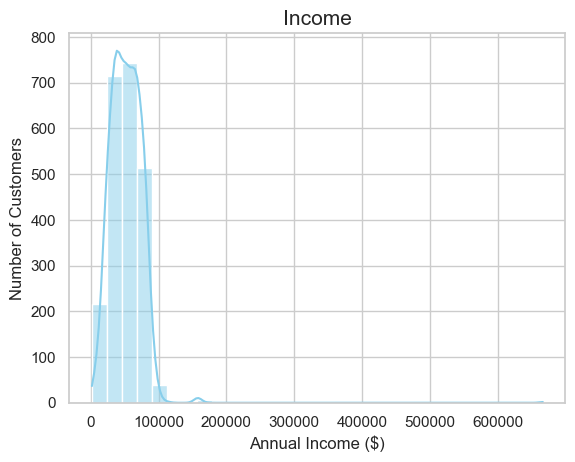

In [102]:
#2. 이상치 처리
#이상치도 데이터지만 이상치로 인해 정상적인 흐름파악 및 분석이 어려움으로 제거
#마케팅 데이터인만큼 별도로 이상치 + 상위n% 고객을 분석해 프리미엄 고객 마케팅을 고려해보려고 함

#데이터 이상치 파악
print(df2.describe())

#나이 : 1893년(최소값), 약 130살 -> 이상치로 판단 -> 110세 이상은 제거하겠다
df2 = df2[df2['Year_Birth'] > 1910]

#수입 : 최소값 최대값 모두 1분위, 4분위와 떨어져 보이지만 "연속성"까지 파악해보고 처리하겠다 -> 시각화로 판단
sns.histplot(
    data=df2,           # 사용할 데이터
    x='Income',         # 가로축에 놓을 컬럼명
    bins=30,            # 막대를 몇 개로 쪼갤 것인가 (숫자가 클수록 촘촘해짐)
    kde=True,           # 막대 위에 부드러운 곡선(추세선)을 그릴지 여부
    color='skyblue'     # 막대 색상
)
plt.title('Income', fontsize=15) # 제목과 글자 크기
plt.xlabel('Annual Income ($)', fontsize=12)              # x축 이름
plt.ylabel('Number of Customers', fontsize=12)            # y축 이름 (빈도수)
plt.show()
    #15만 이상 데이터는 이상치로 판단됨 -> 제거 but 나중에 고소득 고객분류에 사용할거니깐 df새로 파서 저장하겠음(안하겠음)
df2 = df2[df2['Income'] < 150000]

#Mnt~ : max값이 4분위와 떨어진 것들이 보임. 시각화로 추가 확인후 처리, 당장은 이상치로 보이진 않음

In [ ]:
#3. 파생변수 
    # 관계분석 이후 진행하려 했지만 그 전에 해야할 피처 엔지니어링이 있다는걸 깨달음!!

#나이 : 가독성을 위해 변환
df2['Age'] = 2015 - df2['Year_Birth']

#가입 날짜
    #문자열인 날짜를 날짜 형식으로 변환
    #기준일로부터 며칠이나 지났는지 계산
df2['Dt_Customer'] = pd.to_datetime(df2['Dt_Customer'])
df2['Customer_Days'] = (pd.to_datetime('2015-01-01') - df2['Dt_Customer']).dt.days
#가정 : 가입 날짜에 따라 캠페인 반응이 다를 것이다
    #ex) 늦게 가입한 고객은 캠페인 반응이 낮을 것이다 (cmp1~5가 순서대로 나온건진 모르겠지만.. 그래도)
cmp_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
correlation = df2[['Customer_Days'] + cmp_cols].corr()['Customer_Days']
print(correlation)
    #결론 : 가입날짜와 캠페인 반응성은 상관이 없다
    #가입날짜에 따라 쿠폰(할인)을 다르게 해볼까?

#총 자녀수 : 아기와 청소년을 묶어 그저 자녀로 보기 위함
df2['Children'] = df2['Kidhome'] + df2['Teenhome']
    # 자녀여부 (1,0)도 가능하지만 그냥 0명은 0이니깐 그대로 유지

#총 지출금액 : 분야 상관없이 얼마나 쓰는지 체크 / 금은 타상품들과 연관성이 적어 제외
mnt_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']
df2['Total_Spent'] = df2[mnt_cols].sum(axis=1) 

#거주형태 : 동거중이면 1, 아니면 0
    #Married, Together만 동거로 분류
df2['Living_Together'] = df2['Marital_Status'].apply(lambda x: 1 if x in ['Married', 'Together'] else 0)

#마케팅 총 응답 횟수
cmp_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
df2['Total_Campaigns'] = df2[cmp_cols].sum(axis=1)

#수입 대비 지출
df2['Income_Per_Spent'] = df2['Total_Spent'] / df2['Income']

#학력 : 인코딩
edu_map = {
    'Basic': 1,       # 고졸
    '2n Cycle': 2,    # 석사준비 (but 학사는 졸업생, 2n은 준비생이라 더 낮게 매김)
    'Graduation': 3,  # 학사 
    'Master': 4,      # 석사
    'PhD': 5          # 박사
}
df2['Education_Level'] = df2['Education'].map(edu_map)

#프리미엄 상품 : 와인 + 고기 : 고소득자가 자주 구매 및 수익에 큰 영향을 끼치는 상품 묶음
df2['Mnt_Premium'] = df2['MntWines'] + df2['MntMeatProducts']


Customer_Days    1.000000
AcceptedCmp1    -0.039902
AcceptedCmp2     0.005963
AcceptedCmp3    -0.008000
AcceptedCmp4     0.018188
AcceptedCmp5    -0.005555
Name: Customer_Days, dtype: float64


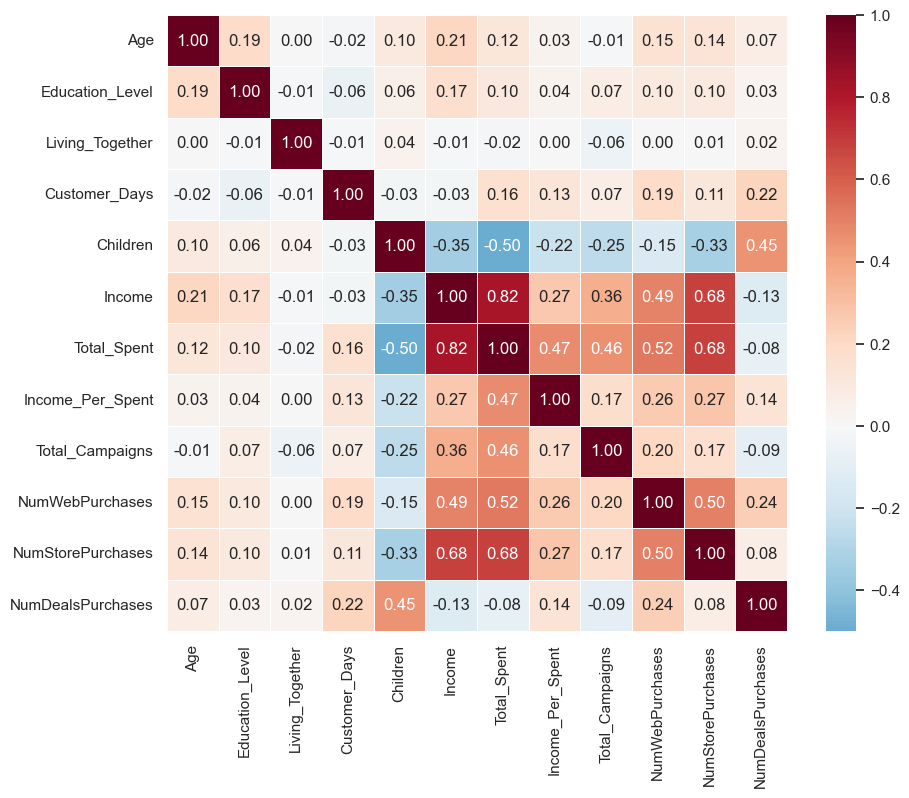

In [108]:
#4. 관계분석
cols = [
    'Age',
    'Education_Level',
    'Living_Together',
    'Customer_Days',
    'Children',
    'Income',
    'Total_Spent',
    'Income_Per_Spent',
    'Total_Campaigns',
    'NumWebPurchases',
    'NumStorePurchases',
    'NumDealsPurchases'
]
corr_matrix = df2[cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap='RdBu_r',
            center=0,
            linewidths=0.5)
plt.show()

#0.2이상 : 분석해볼만 하다
#0.8이상 : 다중공선성 의심해보자

Living_Together : 상관계수가 모두 0.1미만 -> 별 도움이 안된다 

Customer_Days - Total_Spent (0.16) : 오랜 고객일 수록 지출액이 커지는 경향이 있어보인다 

Children - Total_Spent (-0.5) : 아이가 많을수록 지출액이 작아지는 경향이 있다?
- NumWebPurchases는 상대적으로 약한 상관성 -> 자녀고객 특성상 인터넷으로 사려고 하는 경향이 더 크다
- 식료품 등에는 더 많은 금액을, 사치품에는 적은 지출을 하여 가성비 고객이라 지출액이 작아보일 수 있다. 구매내역 추가분석 필요
- 할인구매와 연관성이 있다. 자녀가족군 타겟 제품과 끼어파는등의 전략을 취해도 좋을 듯

Income - NumStorePurchases (0.68) : 수입이 클수록 매장에서 직접 보고 바로바로 사는 경향이 있어보임

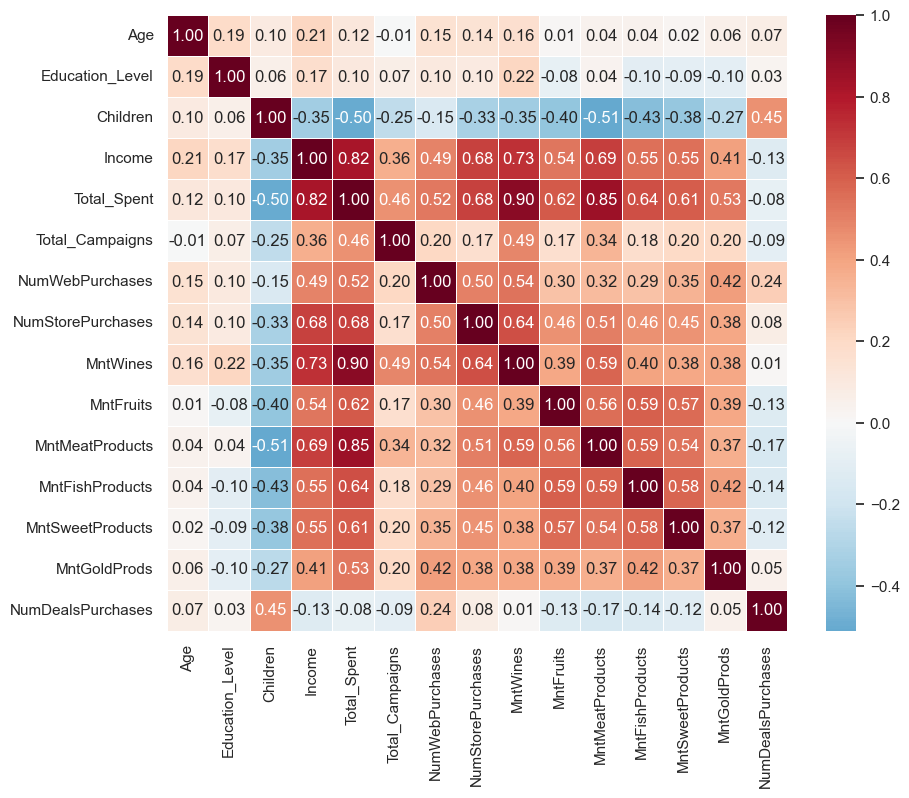

In [ ]:
cols = [
    'Age',
    'Education_Level',
    'Children',
    'Income',
    'Total_Spent',
    'Total_Campaigns',
    'NumWebPurchases',
    'NumStorePurchases',
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds'
]
corr_matrix = df2[cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap='RdBu_r',
            center=0,
            linewidths=0.5)
plt.show()

children - 구매내역 : ... 내 예측(상식)이랑 다르다. 세부내역은 다른 방면으로 봐야할 듯

Income
- 수입이 높을수록 Wine, Meat 구매 경향성 증가

Total_Spent
- Wine, Meat가 수익에 큰 영향을 끼친다. 해당 상품을 잘 안사는 고객이라면 Total_Spent가 작아보일 수 있겠다

Total_Campaigns
- 캠페인 반응성이 높을수록 Wine와 Meat구매가 커보이지만
- 정말 캠페인 때문인지, 아님 원래 해당 마트가 Wine과 Meat구매가 큰 매장이여서인지 파악해봐야 할 듯

구매내역
- 식료품끼리는 잘 엮어 구매한다
- Gold는 다른 상품들과 비교적 연관성이 없다. 노이즈라 판단되어 Total_Spent에서 제외해봐도 좋겠다
- Wine은 특히 고기와 같이 잘 구매한다. 엮어보자